# Capstone Project: Testing the Model on an Independent Dataset, and Future Work

In this section, we will run the model on an independent dataset. Based on the model's classification of the independent dataset, and domain knowledge of materials, we will assess if the model ready for deployment.

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer, recall_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from scipy import stats
import statsmodels.stats.proportion as smprop

In [2]:
# read in data

graye = pd.read_csv('data/graye_modelling.csv')
graye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type                    84 non-null     object 
 1   Cotton                  84 non-null     float64
 2   Organic_cotton          84 non-null     float64
 3   Other_plant             84 non-null     float64
 4   Wool                    84 non-null     float64
 5   Other_animal            84 non-null     float64
 6   Polyester               84 non-null     float64
 7   Nylon                   84 non-null     float64
 8   Spandex                 84 non-null     float64
 9   Polyamide               84 non-null     float64
 10  Other_synthetic         84 non-null     float64
 11  Lyocell                 84 non-null     float64
 12  Viscose                 84 non-null     float64
 13  Rayon                   84 non-null     float64
 14  Other_regenerated       84 non-null     floa

In [3]:
# read in best model

with open('data/rf_pipe.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

### Test Model on Independent Dataset

In [4]:
# get classification

ei_class = best_model.predict(graye)
graye['EI'] = ei_class
graye

,Type,Cotton,Organic_cotton,Other_plant,Wool,Other_animal,Polyester,Nylon,Spandex,Polyamide,...,Chemicals_label,Production_label,Manufacturing_location,Transporation_distance,Use_location,Washing_instruction,Drying_instruction,Reusability_label,Recylability_label,EI
0,t-shirt,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3
1,t-shirt,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,Asia,18354.538462,EU,Machine wash_ cold,Line dry,0,0,3
2,t-shirt,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3
3,t-shirt,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0,0,Asia,18354.538462,EU,Machine wash_ cold,Line dry,0,0,3
4,t-shirt,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,short,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3
80,short,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3
81,trousers,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3
82,trousers,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,Asia,21273.000000,Asia,Machine wash_ cold,Line dry,0,0,3


### EDA

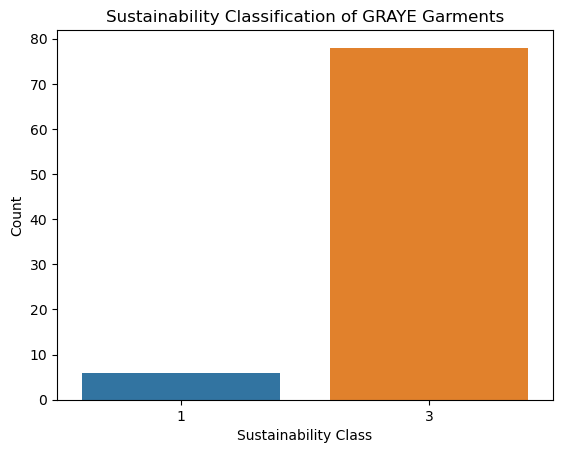

In [29]:
# plot graph

import seaborn as sns
import matplotlib.pyplot as plt

sus_class = pd.DataFrame(graye['EI'].value_counts())

sns.barplot(sus_class, x = sus_class.index, y = 'EI').set(title = 'Sustainability Classification of GRAYE Garments');
plt.xlabel('Sustainability Class')
plt.ylabel('Count');

In [53]:
graye.columns

Index(['Type', 'Cotton', 'Organic_cotton', 'Other_plant', 'Wool',
       'Other_animal', 'Polyester', 'Nylon', 'Spandex', 'Polyamide',
       'Other_synthetic', 'Lyocell', 'Viscose', 'Rayon', 'Other_regenerated',
       'Other', 'Recycled_content', 'Reused_content', 'Material_label',
       'Chemicals_label', 'Production_label', 'Manufacturing_location',
       'Transporation_distance', 'Use_location', 'Washing_instruction',
       'Drying_instruction', 'Reusability_label', 'Recylability_label', 'EI'],
      dtype='object')

In [56]:
graye.groupby(['Type', 'EI'])['Cotton', 'Organic_cotton', 'Other_plant', 'Wool',
       'Other_animal', 'Polyester', 'Nylon', 'Spandex', 'Polyamide',
       'Other_synthetic', 'Lyocell', 'Viscose', 'Rayon', 'Other_regenerated'].agg(['mean'])

/var/folders/5q/pll34czs1rg04zxgqg6sl2qw0000gn/T/ipykernel_2687/4121238449.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graye.groupby(['Type', 'EI'])['Cotton', 'Organic_cotton', 'Other_plant', 'Wool',


Cotton Organic_cotton Other_plant Wool Other_animal Polyester  \
                 mean           mean        mean mean         mean      mean   
Type     EI                                                                    
jacket   1   0.000000            0.0    1.000000  0.0          0.0  0.000000   
         3   0.937500            0.0    0.000000  0.0          0.0  0.000000   
shirt    1   0.000000            0.0    1.000000  0.0          0.0  0.000000   
         3   0.748000            0.0    0.000000  0.0          0.0  0.000000   
short    3   0.830000            0.0    0.000000  0.0          0.0  0.075000   
sweater  3   1.000000            0.0    0.000000  0.0          0.0  0.000000   
t-shirt  3   0.730000            0.0    0.000000  0.0          0.0  0.000000   
trousers 3   0.657826            0.0    0.086957  0.0          0.0  0.026087   

                Nylon   Spandex Polyamide Other_synthetic Lyocell Viscose  \
                 mean      mean      mean            mean    mean    mean   
Type     EI                                                                 
jacket   1   0.000000  0.000000       0.0             0.0     0.0     0.0   
         3   0.057500  0.003750       0.0             0.0     0.0     0.0   
shirt    1   0.000000  0.000000       0.0             0.0     0.0     0.0   
         3   0.048000  0.014667       0.0             0.0     0.0     0.0   
short    3   0.095000  0.000000       0.0             0.0     0.0     0.0   
sweater  3   0.000000  0.000000       0.0             0.0     0.0     0.0   
t-shirt  3   0.000000  0.020000       0.0             0.0     0.0     0.0   
trousers 3   0.152174  0.003913       0.0             0.0     0.0     0.0   

            Rayon Other_regenerated  
             mean              mean  
Type     EI                          
jacket   1    0.0          0.000000  
         3    0.0          0.000000  
shirt    1    0.0          0.000000  
         3    0.0          0.000000  
short    3    0.0          0.000000  
sweater  3    0.0          0.000000  
t-shirt  3    0.0          0.250000  
trousers 3    0.0          0.021739

**Comments:**

The model predicted that most of GRAYE's garments were in the `Medium Sustainability` class (class 3). The model did not blindly predict according to the majority class (`Non-sustainable` - class 4) of the training and testing data set. Furthermore, GRAYE touts itself to be a sustainable clothing label, hence it would not be unreasonable for most of their products to be classified as medium sustainable.

Since the material and type of the garment contribute greatly to the classification (based on feature importance), we will analyse these features.

The table above seems to suggest that material, specifically linen (which was subsumed under the `Other_plants` feature during data cleaning), has the highest positive impact on whether a garment is sustainable. Garments that contained 100% linen were classified as extremely sustainable (class 1). Whereas garments with a majority average percentage of cotton were classified as medium sustainable (class 3). Based on domain knowledge, [linen is considered greener than cotton](https://www.treehugger.com/linen-vs-cotton-5116803#:~:text=In%20terms%20of%20raw%20material,cotton%20cultivated%20around%20the%20world.) because it requires less water and pesticides to produce.

Type (or volume) does not seem to have the highest impact on sustainability classes as there were no shorts classified as extremely sustainable (class 1) or sustainable (class 2) even though they use less material to make than trousers. This could be because it only requires about [1 more yard (90cm) to make trousers rather than shorts.](https://www.sewdiy.com/blog/video-how-to-decide-how-much-fabric-to-buy) Although the amount of material used has a impact on sustainability, it would be amplified by the number of garments made (ie, making 1000 quantities of a garment per month) rather than on the volume taken to make one garment.

Since we are able to rationalise the model's predictions with real world evidence, we are inclined to believe that the model's predictions are quite accurate, and it is ready to be deployed.

A simplified version of the model has also been deployed as a streamlit app and can be accessed [here](https://sustainabilityclassification.streamlit.app/)

## Future Works

**For model improvement:**

1. Since the original dataset has imbalanced classes, perhaps future work could incorporate random sampling to balance the classes. Another possibility would be to collect more data so that the classes are balanced.
2. Based on the model's feature importance and classifications, the materials features have the most impact in the classification. Future works could experiment with more feature engineering on these kind of features to further improve the model if necessary.
3. To really ascertain the model's validity, it could be tested on another independent dataset from a clothing brand that does not claim itself to be sustainable.

**In the sustainability context:**

1. The model could be adapted for companies to improve their sustainability. For example, a company that wants to be greener could input different materials into the model, and check if the use of a particular material would make their products more sustainable. Or if using a certain manufacturing location would make the garments more sustaiable.
2. The model could also be adapted for other types of consumer goods, such as furniture, children's toys, footwear, etc.